# Perkenalan

Nama : Febrian Hendifa

Batch : FTDS-016-RMT

Dataset : https://www.kaggle.com/datasets/utkarshsaxenadn/shoes-classification-dataset-13k-images?datasetId=2677519

Objective : Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Computer Vision/NLP.
- Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

# Import Libraries

In [78]:
import os
import glob
from google.colab import files
import pathlib
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg
import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
!mkdir -p ~/.kaggle #bikin folder di kaggle root
!cp kaggle.json ~/.kaggle # copy paster kaggle.json ke folder kaggle 

!mkdir ./kaggle #bikin folder kaggle di lokasi sama (bukan di root)
!mv ./kaggle.json ./kaggle #move atau pindahi file kaggle.json ke folder kaggle

In [3]:
!chmod 600 ~/.kaggle/kaggle.json #perizinan akses, hanya pemilik file yang memiliki akses baca dan tulis ke file
!ls ~/.kaggle #cek list data yang ada di folder kaggle

kaggle.json


In [13]:
!kaggle datasets download -d utkarshsaxenadn/shoes-classification-dataset-13k-images

 99% 273M/276M [00:08<00:00, 29.1MB/s]
100% 276M/276M [00:08<00:00, 35.7MB/s]


In [14]:
!unzip -q /content/shoes-classification-dataset-13k-images.zip -d images

In [15]:
# Membuat path untuk folder train, val dan test

test_path = '/content/images/Shoes Dataset/Test'
test_Ballet_Flat = '/content/images/Shoes Dataset/Test/Ballet Flat'
test_Boat = '/content/images/Shoes Dataset/Test/Boat'
test_Brogue = '/content/images/Shoes Dataset/Test/Brogue'
test_Clog = '/content/images/Shoes Dataset/Test/Clog'
test_Sneaker = '/content/images/Shoes Dataset/Test/Sneaker'

train_path = '/content/images/Shoes Dataset/Train'
train_Ballet_Flat = '/content/images/Shoes Dataset/Train/Ballet Flat'
train_Boat = '/content/images/Shoes Dataset/Train/Boat'
train_Brogue = '/content/images/Shoes Dataset/Train/Brogue'
train_Clog = '/content/images/Shoes Dataset/Train/Clog'
train_Sneaker = '/content/images/Shoes Dataset/Train/Sneaker'

val_path = '/content/images/Shoes Dataset/Valid'
val_Ballet_Flat = '/content/images/Shoes Dataset/Valid/Ballet Flat'
val_Boat = '/content/images/Shoes Dataset/Valid/Boat'
val_Brogue = '/content/images/Shoes Dataset/Valid/Brogue'
val_Clog = '/content/images/Shoes Dataset/Valid/Clog'
val_Sneaker = '/content/images/Shoes Dataset/Valid/Sneaker'

In [16]:
test_pathc = pathlib.Path(test_path)
test_Ballet_Flat_pathc = pathlib.Path(test_Ballet_Flat)
test_Boat_pathc = pathlib.Path(test_Boat)
test_Brogue_pathc = pathlib.Path(test_Brogue)
test_Clog_pathc = pathlib.Path(test_Clog)
test_Sneaker_pathc = pathlib.Path(test_Sneaker)

train_pathc = pathlib.Path(train_path)
train_Ballet_Flat_pathc = pathlib.Path(train_Ballet_Flat)
train_Boat_pathc = pathlib.Path(train_Boat)
train_Brogue_pathc = pathlib.Path(train_Brogue)
train_Clog_pathc = pathlib.Path(train_Clog)
train_Sneaker_pathc = pathlib.Path(train_Sneaker)

val_pathc = pathlib.Path(val_path)
val_Ballet_Flat_pathc = pathlib.Path(val_Ballet_Flat)
val_Boat_pathc = pathlib.Path(val_Boat)
val_Brogue_pathc = pathlib.Path(val_Brogue)
val_Clog_pathc = pathlib.Path(val_Clog)
val_Sneaker_pathc = pathlib.Path(val_Sneaker)

In [18]:
# Mengecek list folder pada dataset

class_names = np.array(sorted([item.name for item in train_pathc.glob('*')]))
print(class_names)

['Ballet Flat' 'Boat' 'Brogue' 'Clog' 'Sneaker']


In [17]:
# Mengecek jumlah foto pada folder

print('Total Test Images     : ', len(list(test_Ballet_Flat_pathc.glob('*'))) + len(list(test_Boat_pathc.glob('*'))) + len(list(test_Brogue_pathc.glob('*'))) + len(list(test_Clog_pathc.glob('*'))) + len(list(test_Sneaker_pathc.glob('*'))))
print('Total Test Ballet Flat       : ', len(list(test_Ballet_Flat_pathc.glob('*'))))
print('Total Test Boat       : ', len(list(test_Boat_pathc.glob('*'))))
print('Total Test Brogue       : ', len(list(test_Brogue_pathc.glob('*'))))
print('Total Test Clog       : ', len(list(test_Clog_pathc.glob('*'))))
print('Total Test Sneaker       : ', len(list(test_Sneaker_pathc.glob('*'))))
print('-'*10)
print('Total Train Images     : ', len(list(train_Ballet_Flat_pathc.glob('*'))) + len(list(train_Boat_pathc.glob('*'))) + len(list(train_Brogue_pathc.glob('*'))) + len(list(train_Clog_pathc.glob('*'))) + len(list(train_Sneaker_pathc.glob('*'))))
print('Total Train Ballet Flat       : ', len(list(train_Ballet_Flat_pathc.glob('*'))))
print('Total Train Boat       : ', len(list(train_Boat_pathc.glob('*'))))
print('Total Train Brogue       : ', len(list(train_Brogue_pathc.glob('*'))))
print('Total Train Clog       : ', len(list(train_Clog_pathc.glob('*'))))
print('Total Train Sneaker       : ', len(list(train_Sneaker_pathc.glob('*'))))
print('-'*10)
print('Total Val Images     : ', len(list(val_Ballet_Flat_pathc.glob('*'))) + len(list(test_Boat_pathc.glob('*'))) + len(list(test_Brogue_pathc.glob('*'))) + len(list(test_Clog_pathc.glob('*'))) + len(list(test_Sneaker_pathc.glob('*'))))
print('Total Val Ballet Flat       : ', len(list(val_Ballet_Flat_pathc.glob('*'))))
print('Total Val Boat       : ', len(list(val_Boat_pathc.glob('*'))))
print('Total Val Brogue       : ', len(list(val_Brogue_pathc.glob('*'))))
print('Total Val Clog       : ', len(list(val_Clog_pathc.glob('*'))))
print('Total Val Sneaker       : ', len(list(val_Sneaker_pathc.glob('*'))))
print('-'*10)

Total Test Images     :  1215
Total Test Ballet Flat       :  97
Total Test Boat       :  236
Total Test Brogue       :  192
Total Test Clog       :  424
Total Test Sneaker       :  266
----------
Total Train Images     :  10000
Total Train Ballet Flat       :  2000
Total Train Boat       :  2000
Total Train Brogue       :  2000
Total Train Clog       :  2000
Total Train Sneaker       :  2000
----------
Total Val Images     :  1618
Total Val Ballet Flat       :  500
Total Val Boat       :  500
Total Val Brogue       :  500
Total Val Clog       :  500
Total Val Sneaker       :  500
----------


In [19]:
# Membuat dataframe untuk data train dan data test

test_Ballet_Flat = glob.glob(test_path+"/Ballet Flat/*.jpeg")
test_Boat = glob.glob(test_path+"/Boat/*.jpeg")
test_Brogue = glob.glob(test_path+"/Brogue/*.jpeg")
test_Clog = glob.glob(test_path+"/Clog/*.jpeg")
test_Sneaker = glob.glob(test_path+"/Sneaker/*.jpeg")

train_Ballet_Flat = glob.glob(train_path+"/Ballet Flat/*.jpeg")
train_Boat = glob.glob(train_path+"/Boat/*.jpeg")
train_Brogue = glob.glob(train_path+"/Brogue/*.jpeg")
train_Clog = glob.glob(train_path+"/Clog/*.jpeg")
train_Sneaker = glob.glob(train_path+"/Sneaker/*.jpeg")

val_Ballet_Flat = glob.glob(val_path+"/Ballet Flat/*.jpeg")
val_Boat = glob.glob(val_path+"/Boat/*.jpeg")
val_Brogue = glob.glob(val_path+"/Brogue/*.jpeg")
val_Clog = glob.glob(val_path+"/Clog/*.jpeg")
val_Sneaker = glob.glob(val_path+"/Sneaker/*.jpeg")
 
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

test_df = create_dataframe(test_Ballet_Flat + test_Boat + test_Brogue + test_Clog + test_Sneaker)
test_df = test_df.sample(frac=1, random_state=6).reset_index(drop=True)

train_df = create_dataframe(train_Ballet_Flat + train_Boat + train_Brogue + train_Clog + train_Sneaker)
train_df = train_df.sample(frac=1, random_state=6).reset_index(drop=True)

val_df = create_dataframe(val_Ballet_Flat + val_Boat + val_Brogue + val_Clog + val_Sneaker)
val_df = val_df.sample(frac=1, random_state=6).reset_index(drop=True)

In [ ]:
# Mengecek jumlah data train

print(train_df.shape)

# Menampilkan 10 baris pertama pada data train

train_df.tail(10)

In [ ]:
# Mengecek jumlah data test

print(test_df.shape)

# Menampilkan 10 baris pertama pada data test

test_df.head(10)

In [ ]:
# Mengecek jumlah data val

print(val_df.shape)

# Menampilkan 10 baris pertama pada data val

val_df.head(10)

# Exploratory Data Analysis (EDA)

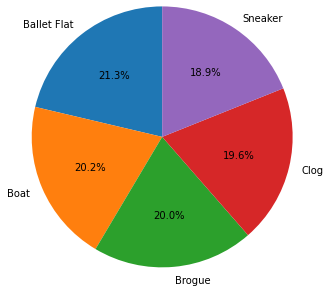

In [158]:
all_df = pd.concat([train_df, val_df, test_df], axis=0)
# colors = ['#a0d157','#c48bb8']
plt.pie(all_df.label.value_counts(),startangle=90,autopct='%0.1f%%',
        labels=['Ballet Flat', 'Boat', 'Brogue', 'Clog', 'Sneaker'],radius=1.5)
plt.show()

In [87]:
def view_random_image(target_folder,target_class):
  target_fin_folder = target_folder + target_class
  random_image = random.sample(os.listdir(target_fin_folder), 1)
  img = mpimg.imread(target_fin_folder + "/" + random_image[0])
  print(f"image_shape:{img.shape} ; image_name:{random_image[0]} ; spectral: {img.ndim}")
  return img

image_shape:(259, 194, 3) ; image_name:Boat Shoe-Train (872).jpeg ; spectral: 3


(-0.5, 193.5, 258.5, -0.5)

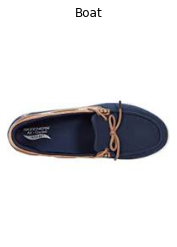

In [88]:
target = 'Boat'
img = view_random_image(target_folder = '/content/images/Shoes Dataset/Train/',
                        target_class = target)
plt.imshow(img)
plt.title(target)
plt.axis("off")

image_shape:(189, 267, 3) ; image_name:Ballet Flat-Train (44).jpeg ; spectral: 3


(-0.5, 266.5, 188.5, -0.5)

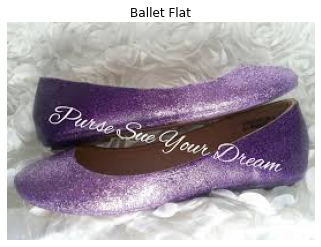

In [89]:
target = 'Ballet Flat'
img = view_random_image(target_folder = '/content/images/Shoes Dataset/Train/',
                        target_class = target)
plt.imshow(img)
plt.title(target)
plt.axis("off")

image_shape:(225, 225, 3) ; image_name:Clog-Train (1952).jpeg ; spectral: 3


(-0.5, 224.5, 224.5, -0.5)

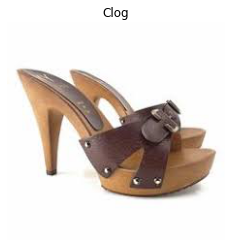

In [90]:
target = 'Clog'
img = view_random_image(target_folder = '/content/images/Shoes Dataset/Train/',
                        target_class = target)
plt.imshow(img)
plt.title(target)
plt.axis("off")

image_shape:(251, 201, 3) ; image_name:Brogue Shoe-Train (464).jpeg ; spectral: 3


(-0.5, 200.5, 250.5, -0.5)

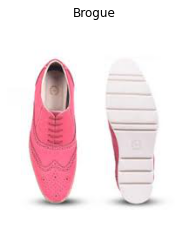

In [91]:
target = 'Brogue'
img = view_random_image(target_folder = '/content/images/Shoes Dataset/Train/',
                        target_class = target)
plt.imshow(img)
plt.title(target)
plt.axis("off")

image_shape:(238, 212, 3) ; image_name:Sneaker-Train (1977).jpeg ; spectral: 3


(-0.5, 211.5, 237.5, -0.5)

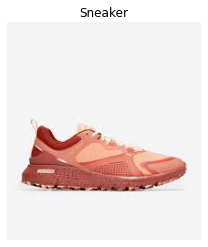

In [92]:
target = 'Sneaker'
img = view_random_image(target_folder = '/content/images/Shoes Dataset/Train/',
                        target_class = target)
plt.imshow(img)
plt.title(target)
plt.axis("off")

- Berdasarkan gambar diatas terlihat jika setiap jenis kelas Ballet Flat, Boat, Brogue, Clog, Sneaker memiliki jenis-jenis sepatu yang berbeda-beda tergantung dari kelasnya masing-masing
- Dan terlihat juga kalo dari setiap kelas Ballet Flat, Boat, Brogue, Clog, Sneaker memiliki ukuran gambar yang berbeda-beda. Dan untuk ukuran gambar ini nanti akan diatur pada proses preprocessing agar setiap gambar memiliki ukuran yang sama

# Data Preprocessing

In [29]:
img_height= 224
img_width= 224
SEED = 1
BATCH =64

In [30]:
# Augmentasi Gambar

train_ag = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_ag = ImageDataGenerator(rescale=1./255)
test_ag = ImageDataGenerator(rescale=1./255)

In [31]:
# Mengatur augmentasi pada data train, val, dan test

train_set = train_ag.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    subset = "training",
    shuffle=True,
    seed=SEED)

val_set = val_ag.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

test_set = test_ag.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

Found 9998 validated image filenames belonging to 5 classes.
Found 2494 validated image filenames belonging to 5 classes.
Found 1215 validated image filenames belonging to 5 classes.


In [32]:
# Menentukan kelas pada data

test_set.class_indices

{'Ballet Flat': 0, 'Boat': 1, 'Brogue': 2, 'Clog': 3, 'Sneaker': 4}

# Model Definition

In [33]:
model_seq = Sequential()

#Conv1
model_seq.add(Conv2D(16, 3, activation ='relu', padding="same", input_shape=[224,224,3]))
model_seq.add(MaxPooling2D(2)) 

#Conv2
model_seq.add(Conv2D(32, 3, activation ='relu', padding="same"))
model_seq.add(MaxPooling2D(2))

#Conv2
model_seq.add(Conv2D(64, 3, activation ='relu', padding="same"))
model_seq.add(MaxPooling2D(2))

model_seq.add(Flatten())
model_seq.add(Dense(64, activation='relu'))
model_seq.add(Dense(32, activation='relu'))
model_seq.add(Dense(5, activation='softmax'))

In [34]:
# Compile Model

model_seq.compile(optimizer = 'Adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [35]:
# Summary Model

model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

# Model Training

In [36]:
# Melakukan training pada model

%%time
history= model_seq.fit(train_set, batch_size= BATCH, epochs= 10, validation_data= val_set) 

Epoch 1/10
157/157 [==============================] - 124s 735ms/step - loss: 1.5603 - accuracy: 0.2857 - val_loss: 1.4936 - val_accuracy: 0.3432
Epoch 2/10
157/157 [==============================] - 114s 728ms/step - loss: 1.4402 - accuracy: 0.3828 - val_loss: 1.3117 - val_accuracy: 0.4619
Epoch 3/10
157/157 [==============================] - 114s 724ms/step - loss: 1.3623 - accuracy: 0.4304 - val_loss: 1.2995 - val_accuracy: 0.4579
Epoch 4/10
157/157 [==============================] - 113s 720ms/step - loss: 1.2938 - accuracy: 0.4752 - val_loss: 1.1833 - val_accuracy: 0.5481
Epoch 5/10
157/157 [==============================] - 114s 726ms/step - loss: 1.2569 - accuracy: 0.4899 - val_loss: 1.1684 - val_accuracy: 0.5373
Epoch 6/10
157/157 [==============================] - 112s 715ms/step - loss: 1.2005 - accuracy: 0.5244 - val_loss: 1.1294 - val_accuracy: 0.5429
Epoch 7/10
157/157 [==============================] - 114s 725ms/step - loss: 1.1419 - accuracy: 0.5504 - val_loss: 1.0825 -

# Model Evaluation

In [53]:
y_pred_seq = model_seq.predict(test_set)
print('baseline')
print(classification_report(test_set.classes, np.array(y_pred_seq).argmax(axis=1)))

19/19 [==============================] - 2s 111ms/step
baseline
              precision    recall  f1-score   support

           0       0.10      0.08      0.09        97
           1       0.18      0.28      0.22       236
           2       0.15      0.12      0.13       192
           3       0.37      0.22      0.28       424
           4       0.20      0.27      0.23       266

    accuracy                           0.22      1215
   macro avg       0.20      0.20      0.19      1215
weighted avg       0.24      0.22      0.22      1215



Terlihat accuracynya 22%, padahal setelah di train dan epoch accurasi mencapai 59%.

Precission disini adalah gambar yang berhasil menebak dari data support sebanyak hasil, jika dilihat dari class 0 angka 0.10 artinya sebanyak 10% berhasil menebak dan 90% menebak salah, dan recall disini sebesar 8% yang artinnya berhasil menebak dan 92% itu adalah data selain class tersebut, begitu pula di kelas 1-4.

In [38]:
# Create Dataframe

history_seq_df = pd.DataFrame(history.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,1.560264,0.285657,1.493636,0.343224
1,1.440169,0.382777,1.311707,0.461909
2,1.362258,0.430386,1.299471,0.457899
3,1.293826,0.475195,1.183316,0.548115
4,1.256871,0.489898,1.168424,0.537290
5,1.200485,0.524405,1.129364,0.542903
6,1.141948,0.550410,1.082509,0.579791
7,1.126750,0.566113,1.093341,0.582598
8,1.094324,0.573015,1.042984,0.588212
9,1.057526,0.597620,1.033224,0.593424


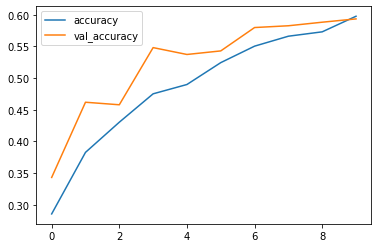

In [39]:
# Plot Accuracy dan val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

Pada grafik ini terlihat bagus dimana nilai valnya berada diatas dari train meskipun ada indikasi overfit pada epoch 10 keatas

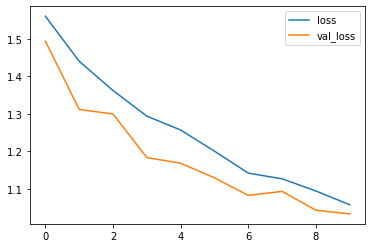

In [40]:
# Plot loss dan val_loss

history_seq_df[['loss', 'val_loss']].plot()

Pada grafik ini juga terlihat bagus dimana kemampuan belajar sudah baik, karena lossnya mengalami penurunan dengan bertambahnnya EPOCH val dan train.

In [67]:
test_results = model_seq.evaluate(test_set,
                                #verbose=0
                                )
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

19/19 [==============================] - 2s 116ms/step - loss: 1.2675 - accuracy: 0.4848
Test Loss     : 1.2675
Test Accuracy : 0.4848


# Model Improvement

In [41]:
model_seq1 = Sequential()

#Conv1
model_seq1.add(Conv2D(32, 3, activation='relu', padding='same',input_shape=[224,224,3]))
model_seq1.add(MaxPooling2D(2))

#Conv2
model_seq1.add(Conv2D(64, 3, activation='relu', padding='same'))
model_seq1.add(MaxPooling2D(2))

#flatten
model_seq1.add(Flatten())
model_seq1.add(Dense(64, activation='relu'))
model_seq1.add(Dropout(rate=0.1))
model_seq1.add(Dense(32, activation='relu'))
model_seq1.add(Dropout(rate=0.1))
model_seq1.add(Dense(5, activation='softmax'))

In [42]:
# #model compile
model_seq1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [43]:
model_seq1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [44]:
#buat callback
callbacks1 = [ 
    EarlyStopping(monitor = 'val_loss', patience = 5), 
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only=True)
 ]

In [45]:
his1= model_seq1.fit(train_set, batch_size= BATCH, epochs= 25, validation_data= val_set, callbacks = callbacks1)

Epoch 1/25
157/157 [==============================] - 122s 770ms/step - loss: 1.7480 - accuracy: 0.2197 - val_loss: 1.5827 - val_accuracy: 0.2706
Epoch 2/25
157/157 [==============================] - 124s 792ms/step - loss: 1.5472 - accuracy: 0.2801 - val_loss: 1.4539 - val_accuracy: 0.3613
Epoch 3/25
157/157 [==============================] - 119s 757ms/step - loss: 1.4743 - accuracy: 0.3420 - val_loss: 1.4030 - val_accuracy: 0.3769
Epoch 4/25
157/157 [==============================] - 117s 742ms/step - loss: 1.4230 - accuracy: 0.3779 - val_loss: 1.3629 - val_accuracy: 0.4046
Epoch 5/25
157/157 [==============================] - 115s 735ms/step - loss: 1.3961 - accuracy: 0.4038 - val_loss: 1.3531 - val_accuracy: 0.4374
Epoch 6/25
157/157 [==============================] - 116s 738ms/step - loss: 1.3718 - accuracy: 0.4188 - val_loss: 1.2906 - val_accuracy: 0.4687
Epoch 7/25
157/157 [==============================] - 116s 739ms/step - loss: 1.3471 - accuracy: 0.4360 - val_loss: 1.2728 -

In [46]:
y_pred_seq1 = model_seq1.predict(test_set)
print('Setelah Improvment')
print(classification_report(test_set.classes, np.array(y_pred_seq1).argmax(axis=1)))

19/19 [==============================] - 3s 141ms/step
Setelah Improvment
              precision    recall  f1-score   support

           0       0.10      0.18      0.13        97
           1       0.17      0.21      0.19       236
           2       0.15      0.13      0.14       192
           3       0.34      0.19      0.25       424
           4       0.22      0.29      0.25       266

    accuracy                           0.21      1215
   macro avg       0.20      0.20      0.19      1215
weighted avg       0.23      0.21      0.21      1215



Terlihat accuracynya 21%, padahal setelah di train dan epoch accurasi mencapai 60%.

Precission disini adalah gambar yang berhasil menebak dari data support sebanyak hasil, jika dilihat dari class 0 angka 0.10 artinya sebanyak 10% berhasil menebak dan 90% menebak salah, dan recall disini sebesar 18% yang artinnya berhasil menebak dan 82% itu adalah data selain class tersebut, begitu pula di kelas 1-4.

In [55]:
#buat dataframe
history_seq1_df = pd.DataFrame(his1.history)
history_seq1_df

,loss,accuracy,val_loss,val_accuracy
0,1.748037,0.219744,1.582723,0.270650
1,1.547231,0.280056,1.453933,0.361267
2,1.474285,0.341968,1.403018,0.376905
3,1.422996,0.377876,1.362921,0.404571
4,1.396063,0.403781,1.353091,0.437450
5,1.371761,0.418784,1.290565,0.468725
6,1.347108,0.435987,1.272806,0.472334
7,1.321479,0.456991,1.250725,0.479952
8,1.299936,0.460892,1.235961,0.502005
9,1.279532,0.474795,1.201604,0.533280


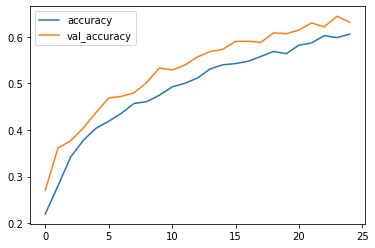

In [56]:
# Plot Accuracy dan val_accuracy

history_seq1_df[['accuracy', 'val_accuracy']].plot()

Pada grafik ini terlihat bagus dimana nilai valnya berada diatas dari train dan perbedaannya juga tidak terlalu jauh

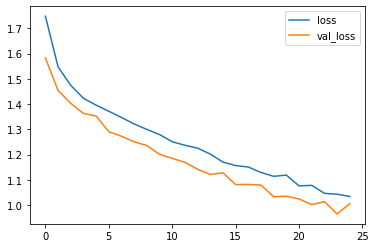

In [57]:
# Plot loss dan val_loss

history_seq1_df[['loss', 'val_loss']].plot()

Pada grafik ini juga terlihat bagus dimana kemampuan belajar sudah baik, karena lossnya mengalami penurunan

base model
after improvement


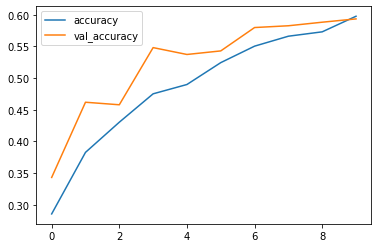

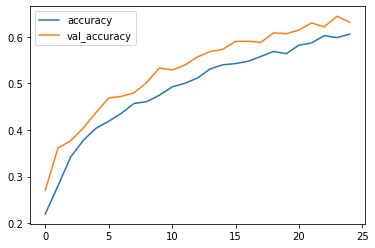

In [58]:
print('base model')
history_seq_df[['accuracy', 'val_accuracy']].plot()
print('============================================')
print('after improvement')
history_seq1_df[['accuracy', 'val_accuracy']].plot()

Disini terlihat jika setelah dilakukan model improvment akurasinya mengalami peningkatan

In [71]:
print('Sebelum Improvment')
test_results = model_seq.evaluate(test_set,
                                #verbose=0
                                )
print(f'Loss on Training Data     : {test_results[0]:.4f}')
print(f'Accuracy on Training Data : {test_results[1]:.4f}')
print('===================================================================')
print('Setelah Improvment')
test_results = model_seq1.evaluate(test_set,
                                #verbose=0
                                )
print(f'Loss on Training Data     : {test_results[0]:.4f}')
print(f'Accuracy on Training Data : {test_results[1]:.4f}')

Sebelum Improvment
19/19 [==============================] - 2s 119ms/step - loss: 1.2675 - accuracy: 0.4848
Loss on Training Data     : 1.2675
Accuracy on Training Data : 0.4848
Setelah Improvment
19/19 [==============================] - 2s 122ms/step - loss: 1.2297 - accuracy: 0.5086
Loss on Training Data     : 1.2297
Accuracy on Training Data : 0.5086


Terlihat disini ada kenaikan rata-rata setelah dilakukannya model improvement

Terlihat disini jika model mengalami kenaikan setelah dilakukannya model Improvement dimana untuk nilai akurasinya naik 2% dari 48% menjadi 50% dan juga untuk lossnya mengalami penurunan yang berarti model mengalami peningkatan setelah dilakukan model improvement

# Model Saving

In [73]:
# Freeze Model

model_seq1.trainable = False

model_seq1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200704)            0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [74]:
#Save Model
model_seq1.save("model_seq1")

In [75]:
#Lakukan Zip
! zip -r model_seq1.zip model_seq1

  adding: model_seq1/ (stored 0%)
  adding: model_seq1/assets/ (stored 0%)
  adding: model_seq1/keras_metadata.pb (deflated 91%)
  adding: model_seq1/variables/ (stored 0%)
  adding: model_seq1/variables/variables.index (deflated 67%)
  adding: model_seq1/variables/variables.data-00000-of-00001 (deflated 27%)
  adding: model_seq1/saved_model.pb (deflated 89%)


In [76]:
#Download h5
model_seq1.save("model_seq1.h5")

# Model Inference

(224, 224, 3)
1/1 [==============================] - 0s 51ms/step
[0.0, 0.0, 0.0, 1.0, 0.0]
Clog


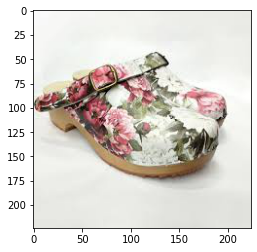

In [103]:
# Melakukan testing

img = keras.utils.load_img("/content/images/Shoes Dataset/Train/Clog/Clog-Train (1066).jpeg",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 28ms/step
[0.0, 0.0, 0.0, 0.0, 1.0]
Sneaker


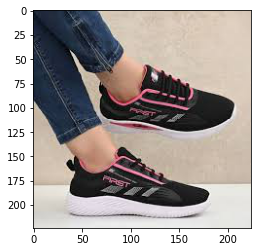

In [96]:
img = keras.utils.load_img("/content/images/Shoes Dataset/Train/Sneaker/Sneaker-Train (1007).jpeg",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 17ms/step
[0.0, 0.0, 0.0, 1.0, 0.0]
Clog


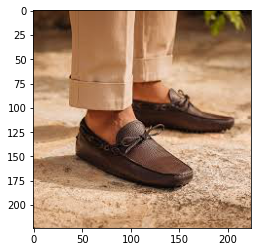

In [155]:
img = keras.utils.load_img("/content/images/Shoes Dataset/Test/Boat/Boat Shoe-Test (112).jpeg",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 27ms/step
[1.0, 0.0, 0.0, 0.0, 0.0]
Ballet Flat


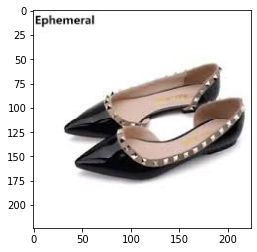

In [110]:
img = keras.utils.load_img("/content/images/Shoes Dataset/Train/Ballet Flat/Ballet Flat-Train (1001).jpeg",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 19ms/step
[0.0, 0.0, 0.0, 1.0, 0.0]
Clog


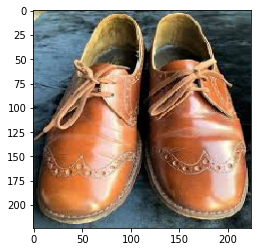

In [144]:
img = keras.utils.load_img("/content/images/Shoes Dataset/Train/Brogue/Brogue Shoe-Train (1555).jpeg",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 16ms/step
[0.0, 0.0, 0.0, 0.0, 1.0]
Sneaker


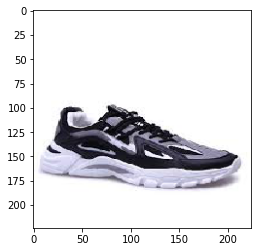

In [145]:
img = keras.utils.load_img("/content/download.jfif",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 53ms/step
[0.0, 0.0, 0.0, 1.0, 0.0]
Clog


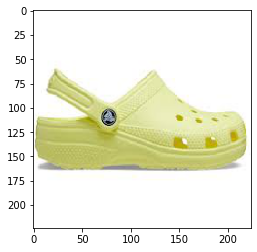

In [156]:
img = keras.utils.load_img("/content/download (1).jfif",target_size = (224,224))
img = np.array(img)
plt.imshow(img)
print(img.shape)

label_dict = {0:'Ballet Flat',1:'Boat',2:'Brogue',3:'Clog',4:'Sneaker'}
img = np.expand_dims(img,axis = 0)
result = model_seq1.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

# Pengambilan Kesimpulan

- Dataset ini terbagi terdiri dari data Train, Test, dan Val, karna data ini sudah memliki data Val jadi tidak perlagi memecah data Train menjadi data Val.
- Dataset ini memiliki 21.3% gambar Ballet Flat, 20.2% gambar Boat, 20% gambar Brogue, 19.6% gambar Clog, dan 18.9% gambar Sneaker.
- Pada model Sequential API, setelah dilakukan model improvement model mengalami peningkatan akurasi 2% dan pada data lossnya mengalami penurunan setelah dilakukannya model improvement.
- Setelah dilakukan testing dengan menggunakan 7 gambar dimana 5nya diambil dari gambar dataset dan 2 gambar lainnya diambil dari google, dan dari ke 7 gambar itu 2 diantaranya mengalami salah prediksi dan 5 lainnya benar prediksinya.